In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

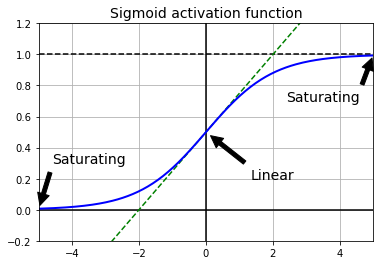

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3 / 4, 7 / 4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), 
             arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), 
             arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), 
             arrowprops=props, fontsize=14, ha='center')
plt.grid(True)
plt.title('Sigmoid activation function', fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', 
                                          distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

LeakyReLU

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha * z, z)

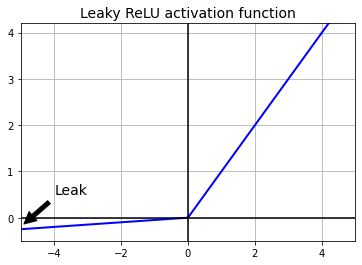

In [8]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2],'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), 
             arrowprops=props, fontsize=14, ha='center')
plt.title('Leaky ReLU activation function', fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')    
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['acc'])

In [13]:
history = model.fit(x_train, y_train, 
                    epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2819 - acc: 0.6229 - val_loss: 0.8886 - val_acc: 0.7160
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7955 - acc: 0.7362 - val_loss: 0.7130 - val_acc: 0.7656
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6816 - acc: 0.7721 - val_loss: 0.6427 - val_acc: 0.7898
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6217 - acc: 0.7944 - val_loss: 0.5900 - val_acc: 0.8064
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5832 - acc: 0.8075 - val_loss: 0.5582 - val_acc: 0.8198
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5553 - acc: 0.8157 - val_loss: 0.5350 - val_acc: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 984us/step - loss: 0.5338 - acc: 0.8224 - val_loss: 0.5157 - val_acc: 0.8304
Epoch 8/10
1719/1719 [==============================] - 2s 1

PReLU

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')    
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['acc'])

In [15]:
history = model.fit(x_train, y_train, 
                    epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.3461 - acc: 0.6209 - val_loss: 0.9255 - val_acc: 0.7184
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8197 - acc: 0.7355 - val_loss: 0.7305 - val_acc: 0.7632
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6966 - acc: 0.7693 - val_loss: 0.6564 - val_acc: 0.7884
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6331 - acc: 0.7910 - val_loss: 0.6003 - val_acc: 0.8046
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5917 - acc: 0.8056 - val_loss: 0.5656 - val_acc: 0.8184
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5618 - acc: 0.8135 - val_loss: 0.5406 - val_acc: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5391 - acc: 0.8205 - val_loss: 0.5196 - val_acc: 0.8312
Epoch 8/10
1719/1719 [==============================] - 2s 1ms